## Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

#### Martin Reilly

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x17be38f1978>)

#### Reproduce without having to go back to the website and clicking again -> look at first 10 rows

In [3]:
with open('Fremont.csv') as f:
    for _ in range(10):
        print(f.readline())

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk

12/31/2018 11:00:00 PM,7,6

12/31/2018 10:00:00 PM,3,4

12/31/2018 09:00:00 PM,7,7

12/31/2018 08:00:00 PM,12,14

12/31/2018 07:00:00 PM,9,5

12/31/2018 06:00:00 PM,17,29

12/31/2018 05:00:00 PM,29,52

12/31/2018 04:00:00 PM,35,77

12/31/2018 03:00:00 PM,35,78



#### If you are used to working in python you may want to get the data into a data framework
##### Want to set the index column to date instead of row number
##### Would like pandas to parse the dates automatically and turn them into dates

In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2018-12-31 23:00:00,7.0,6.0
2018-12-31 22:00:00,3.0,4.0
2018-12-31 21:00:00,7.0,7.0
2018-12-31 20:00:00,12.0,14.0
2018-12-31 19:00:00,9.0,5.0


### Visualize

#### %matplotlib inline tells the notebook to put any plots in the notebook itself rather that in seperate windows
#### we can use data.plot() just to see what pandas shows us here
##### you can see the data is a little dense, they are hourly counts over 6 years

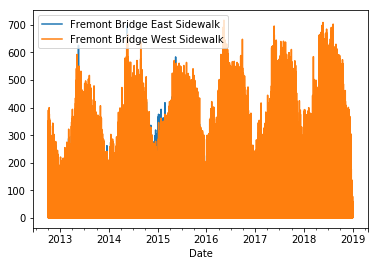

In [5]:
%matplotlib inline
data.plot()

#### To see it a little better we can resample weekly and take the sum - we are going to take the total number of rides each week over the course of these years.

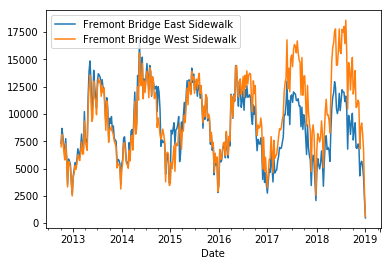

In [6]:
## %matplotlib inline
data.resample('W').sum().plot();

#### Changing the style of the plots away from the default %matplotlib style.
#### We can use the style module and choose 'seaborn', note defaults will return once you restart Jupyter Notebook

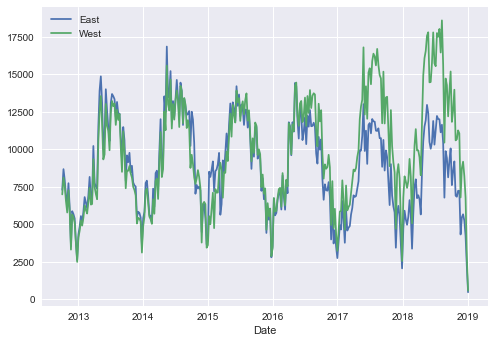

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
## plt.style.use('classic')
data.columns = ['East', 'West']
data.resample('W').sum().plot();

### To see if there are trends like annual growth or decline in ridership.
#### We can do rolling window, lets resample daily and do a rolling sum over 365 days.
#### What comes out is the annual trend

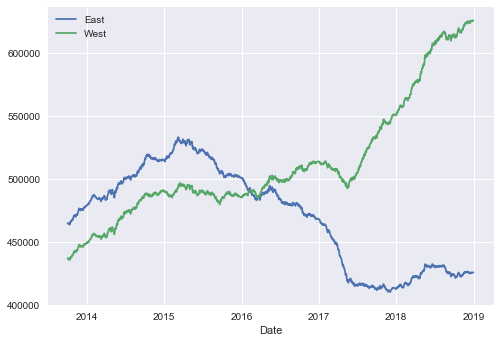

In [8]:
data.resample('D').sum().rolling(365).sum().plot();

#### These axes limits are a little bit suspect because they do not go all the way to zero.
#### If might be better if we can set the Y limit from 0 to None (use the current maximum)
#### This will allow us to better see what's going on

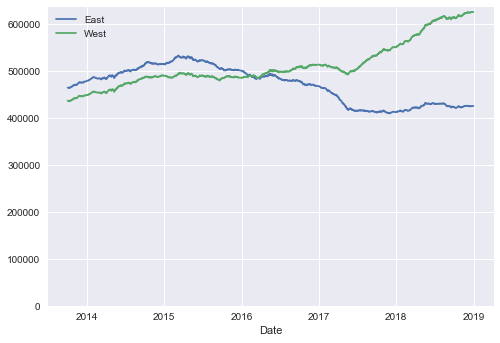

In [9]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

#### To see the overall trand we can introduce a new line Total

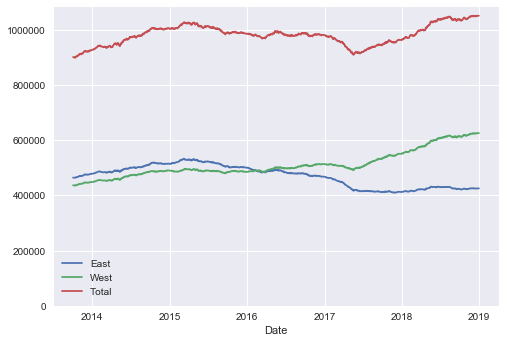

In [10]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

#### We can take a look at the trend within individual days, use grouping and the daily mean
#### Note: the index was set to date earlier using pandas

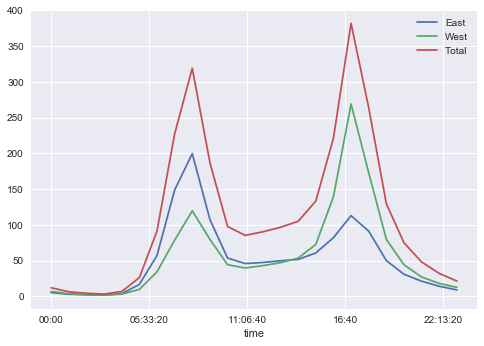

In [11]:
data.groupby(data.index.time).mean().plot();

### People going into the city on the east side in the morning and out of the city on the west side in the afternoon

### This average is nice but it would also be nice to see the whole data set in this way, and one way we can do that is by using a Pivot Table

#### Lets look at the first 5 by 5 block of the pivot table
##### Each column is a day in the dataset and each row corresponds to an hour during that day

In [12]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


#### Lets take a look at the pivot table
##### We have a line for each day of the 6 years

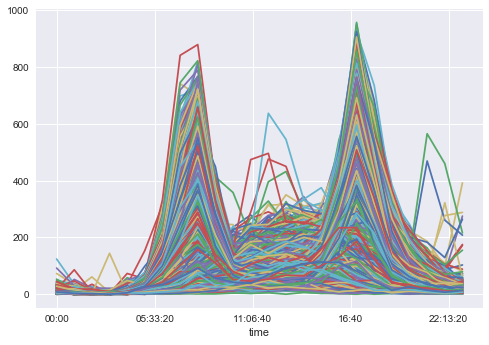

In [13]:
pivoted.plot(legend=False);

#### Lets introduce the transparancy where we plot a whole lot of transtarant lines on top or each other to get a trent in crossings of the day changes throughout this six year period

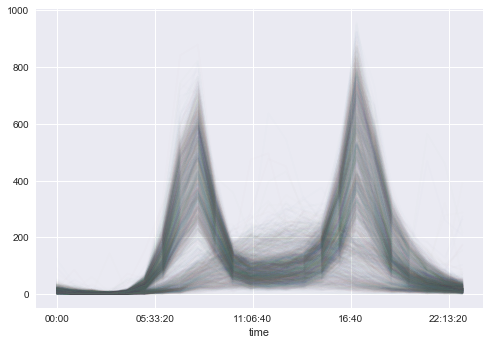

In [14]:
pivoted.plot(legend=False, alpha=0.01);

##### Now you see there are a bunch of days that have this bimodal commute pattern but there are days that do not have the commute pattern, they peak during mid-day and go down over the rest of the day. The best hypothesis is work days vrs week days/holidays